In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_to_file = '2_taxi_nyc.csv'
taxi = pd.read_csv(path_to_file)
taxi.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


## 3.1
Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.  
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]
Строка names уже задана.

In [5]:
names = 'Name1 Surname1, Name2 Surname2, …'
names_list = names.split(', ')
names_list

['Name1 Surname1', 'Name2 Surname2', '…']

## 3.2
В переменной df содержатся данные. Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35. Поместите результат в переменную medium_35.

In [23]:
taxi[(taxi.borough == 'Queens') & (taxi.pickups > 800)]

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
27640,2015-06-22 00:00:00,Jun,Queens,831,N,5.0,10.0,80.0,67.0,1007.8,0.0,0.01,0.0,0.0


In [ ]:
medium_35 = df[(df.wealth == 'medium') & (df.age > 35)]

## 3.3
Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:
Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [28]:
taxi.rename(columns={'pickup_month': 'pm'}).head(1)

,pickup_dt,pm,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [26]:
df.rename(columns={'Клиент id': 'client_id', 'Пол': 'sex' ,'Благосостояние': 'wealth', 'Возраст': 'age'}, inplace=True)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


## 3.7
💀 Сложное задание! 💀

А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу  
считывает переданный файл, в котором разделителем является ;  
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)  
возвращает результат этих действий (агрегированный датафрэйм)

In [7]:
path = '2_taxi_nyc.csv'

In [15]:
def read_n_agg(path: pd.DataFrame):
    df = pd.read_csv(path, sep=',')
    return df.groupby('borough').pickups.mean().to_frame()

In [16]:
read_n_agg(path).head()

,pickups
borough,
Bronx,50.667050
Brooklyn,534.431269
EWR,0.024177
Manhattan,2387.253281
Queens,309.354824


In [ ]:
def read_n_agg(path):
    df = pd.read_csv(path, sep=';')
    return df.groupby('company').income.mean().to_frame()

## 3.8
Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file.  
Загрузите датасет, используя ; в качестве разделителя.  
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).  
Результат запишите в переменную taxi.

In [3]:
path_to_file = '3_taxi_peru.csv'

In [4]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


## 3.9
Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [14]:
(taxi.groupby('source', dropna=False).source.count() / taxi.shape[0] * 100).round().max()

42.0

## 3.10
Чтобы показать разницу более наглядно, попробуем визуализировать показатели.  
Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).  
Какой график получился?

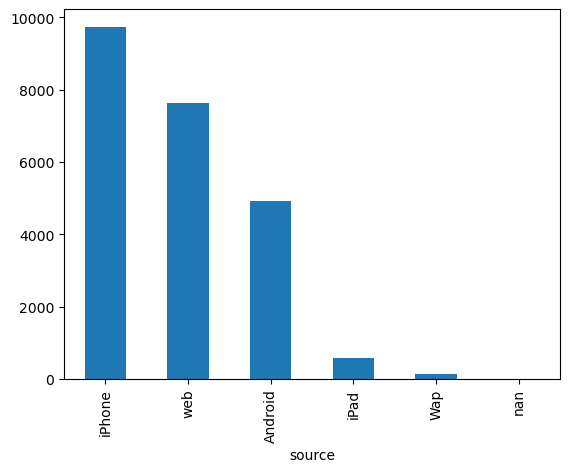

In [25]:
taxi.groupby('source', dropna=False).source.count().sort_values(ascending=False).plot.bar();

## 3.11
Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

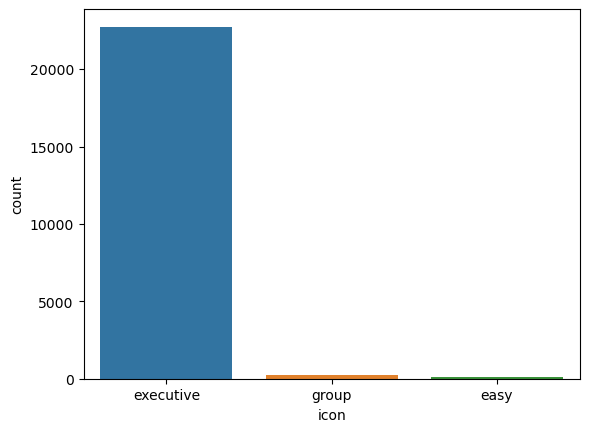

In [32]:
sns.countplot(x=taxi['icon']);

## 3.12
Теперь попробуем построить более сложный график!  
С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).  
Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. 

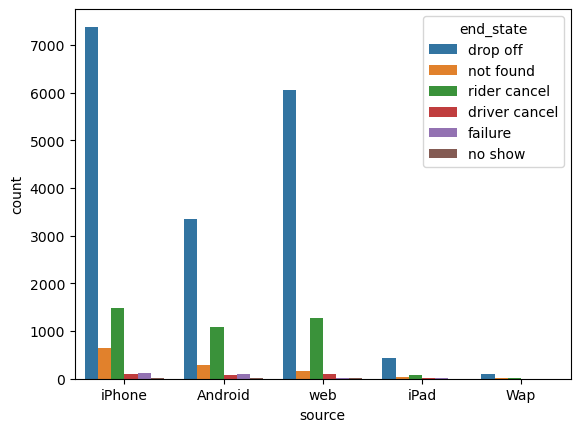

In [35]:
sns.countplot(taxi, x='source', hue='end_state');

## 3.13
Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts

In [41]:
driver_score_counts = taxi.driver_score\
                            .value_counts(normalize=True)\
                            .mul(100)\
                            .round(2)\
                            .reset_index()\
                            .rename(columns={'driver_score': 'percentage', 'index': 'driver_score'})\
                            .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


## 3.14
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график

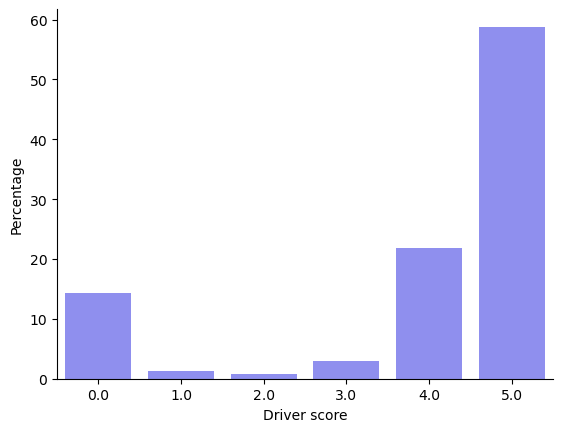

In [45]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

## 3.15
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.  
В чем его отличие от распределения оценок водителей?

In [47]:
rider_score_counts = taxi.rider_score \
                            .value_counts(normalize=True)\
                            .mul(100)\
                            .round(2)\
                            .reset_index()\
                            .rename(columns={'rider_score': 'percentage', 'index': 'rider_score'})\
                            .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


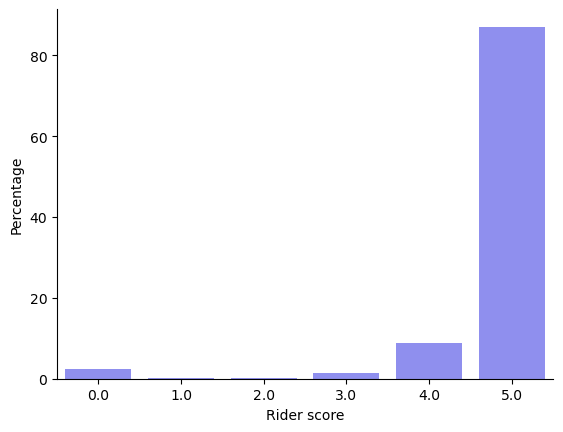

In [49]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [5]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
